In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
import re
import string
punct = string.punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.utils import resample

#Importing necessary libraries
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


import pandas as pd
import numpy as np
import seaborn as sb
#import plotly.graph_objects as go
import matplotlib.pyplot  as plt
#import plotly.express as px
from collections import Counter
import re
#import unidecode
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import nltk 
import string     
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /Users/adwait/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adwait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,song,artist,lyrics,cleaned_lyrics,genre
0,94687,eternal-eclipse,edge-of-sanity,I hate humanity and I will not hesitate to kil...,I hate humanity I hesitate kill ! There 's hat...,Metal
1,122833,walk-me-out-in-the-morning-dew,grateful-dead,Walk me out in the mornin' dew my honey\nWalk ...,Walk mornin ' dew honey Walk mornin ' dew toda...,Rock
2,37976,helping-you-hate-me,bluebottle-kiss,I know it's a clich\nWhen they say we were doo...,I know 's clich When say doomed could start We...,Rock
3,38325,trailerpark,blur,Fist out\nFist out for the five\nFist out\nI'm...,Fist Fist five Fist I 'm country boy I got sou...,Rock
4,35331,when-i-see-his-face,blake-babies,It could be any day now\nIt could be any day\n...,It could day It could day It could day Nothing...,Rock


In [6]:
df.drop('id',inplace=True,axis = 1)

In [7]:
df.head()

,song,artist,lyrics,cleaned_lyrics,genre
0,eternal-eclipse,edge-of-sanity,I hate humanity and I will not hesitate to kil...,I hate humanity I hesitate kill ! There 's hat...,Metal
1,walk-me-out-in-the-morning-dew,grateful-dead,Walk me out in the mornin' dew my honey\nWalk ...,Walk mornin ' dew honey Walk mornin ' dew toda...,Rock
2,helping-you-hate-me,bluebottle-kiss,I know it's a clich\nWhen they say we were doo...,I know 's clich When say doomed could start We...,Rock
3,trailerpark,blur,Fist out\nFist out for the five\nFist out\nI'm...,Fist Fist five Fist I 'm country boy I got sou...,Rock
4,when-i-see-his-face,blake-babies,It could be any day now\nIt could be any day\n...,It could day It could day It could day Nothing...,Rock


In [8]:
df.genre = df.genre.astype(str)

In [9]:
df.genre = df.genre.apply(lambda x: ' '.join([re.sub('Hip-Hop','HipHop',word) for word in x.split()]))

In [10]:
df.genre = df.genre.apply(lambda x: ' '.join([re.sub('R&B','RythBlues',word) for word in x.split()]))

In [11]:
df.genre.value_counts()

Rock          51846
Pop           14955
Metal          9031
HipHop         7094
Country        5988
Jazz           3340
Electronic     2272
RythBlues      1765
Indie          1075
Folk            425
nan              65
Name: genre, dtype: int64

In [12]:
df.shape

(97856, 5)

In [62]:
# Separate majority and minority classes
df_Rock = df[df.genre=='Rock']
df_Pop = df[df.genre=='Pop']
df_Metal = df[df.genre=='Metal']
df_HipHop = df[df.genre =='HipHop']
df_Country = df[df.genre=='Country']
df_Jazz = df[df.genre=='Jazz']
df_Electronic = df[df.genre=='Electronic']
df_RythBlues = df[df.genre=='RythBlues']
df_Indie = df[df.genre=='Indie']
df_Folk = df[df.genre=='Folk']
 
# Upsample minority class
# df_Rock_sampled = resample(df_Rock, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=7094,    # to match majority class
#                                  random_state=123) # reproducible results

df_Pop_sampled = resample(df_Pop, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Metal_sampled = resample(df_Metal, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_HipHop_sampled = resample(df_HipHop, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Country_sampled = resample(df_Country, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Jazz_sampled = resample(df_Jazz, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Electronic_sampled = resample(df_Electronic, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_RythBlues_sampled = resample(df_RythBlues, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Indie_sampled = resample(df_Indie, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results

df_Folk_sampled = resample(df_Folk, 
                                 replace=True,     # sample with replacement
                                 n_samples=51846,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
frame = pd.concat([df_Rock,df_Pop_sampled,df_Metal_sampled,df_HipHop_sampled,df_Country_sampled,df_Jazz_sampled,
                         df_Electronic_sampled,df_RythBlues_sampled,df_Indie_sampled,df_Folk_sampled])
 
# Display new class counts
frame.genre.value_counts()

Folk          51846
Indie         51846
Country       51846
Rock          51846
Metal         51846
Jazz          51846
Pop           51846
RythBlues     51846
Electronic    51846
HipHop        51846
Name: genre, dtype: int64

In [63]:
frame.head()

,song,artist,lyrics,cleaned_lyrics,genre
1,walk-me-out-in-the-morning-dew,grateful-dead,Walk me out in the mornin' dew my honey\nWalk ...,Walk mornin ' dew honey Walk mornin ' dew toda...,Rock
2,helping-you-hate-me,bluebottle-kiss,I know it's a clich\nWhen they say we were doo...,I know 's clich When say doomed could start We...,Rock
3,trailerpark,blur,Fist out\nFist out for the five\nFist out\nI'm...,Fist Fist five Fist I 'm country boy I got sou...,Rock
4,when-i-see-his-face,blake-babies,It could be any day now\nIt could be any day\n...,It could day It could day It could day Nothing...,Rock
6,call-your-name,beatles,I call your name but you're not there\nWas I t...,"I call name 're Was I blame unfair Oh , I ca n...",Rock


In [64]:
len(frame.genre.unique())

10

In [65]:
frame.shape

(518460, 5)

In [66]:
#Converting the columns into strings
frame.song = frame.song.astype(str)
frame.artist = frame.song.astype(str)
frame.lyrics = frame.lyrics.astype(str)
frame.cleaned_lyrics = frame.cleaned_lyrics.astype(str)

In [127]:
frame.head()

,song,artist,lyrics,cleaned_lyrics,genre,tokens
1,walk-me-out-in-the-morning-dew,walk-me-out-in-the-morning-dew,Walk me out in the mornin' dew my honey\nWalk ...,Walk mornin ' dew honey Walk mornin ' dew toda...,Rock,Walk mornin ' dew honey Walk mornin ' dew toda...
2,helping-you-hate-me,helping-you-hate-me,I know it's a clich\nWhen they say we were doo...,I know 's clich When say doomed could start We...,Rock,I know 's clich When say doomed could start We...
3,trailerpark,trailerpark,Fist out\nFist out for the five\nFist out\nI'm...,Fist Fist five Fist I 'm country boy I got sou...,Rock,Fist Fist five Fist I 'm country boy I got sou...
4,when-i-see-his-face,when-i-see-his-face,It could be any day now\nIt could be any day\n...,It could day It could day It could day Nothing...,Rock,It could day It could day It could day Nothing...
6,call-your-name,call-your-name,I call your name but you're not there\nWas I t...,"I call name 're Was I blame unfair Oh , I ca n...",Rock,"I call name 're Was I blame unfair Oh , I ca n..."


In [ ]:
frame.to_excel('Data_TL.xlsx')

In [204]:
#modeling
#train test split
#Bag of words vectorizer Unigrams
X_train, X_test, y_train, y_test = train_test_split(frame['cleaned_lyrics'], frame['genre'], test_size = 0.2, random_state=0, shuffle = True, stratify=frame['genre'])
# bow_vectorizer = CountVectorizer()
# X_train_vect = bow_vectorizer.fit_transform(X_train)
# X_test_vect = bow_vectorizer.fit_transform(X_train)

In [205]:
#TF-IDF vectorizer Unigrams
X1_train, X1_test, y1_train, y1_test = train_test_split(frame['cleaned_lyrics'], frame['genre'], test_size = 0.2, random_state=0, shuffle = True, stratify=frame['genre'])
# tfidf_vectorizer = TfidfVectorizer()
# X1_train_vect = tfidf_vectorizer.fit_transform(X1_train)

In [196]:
#Naive Bayes with Bag of words
nb_bow = Pipeline([('bow_vectorizer', CountVectorizer(lowercase = False)), ('nb', MultinomialNB())])
nb_bow.fit(X_train, y_train)
y_pred = nb_bow.predict(X_test)
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred))
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')
print(f1_score(y_test, y_pred,average = 'macro'))

Predicted   Country  Electronic  Folk  HipHop  Indie  Jazz  Metal   Pop  Rock  \
Actual                                                                          
Country        7441          78    43      44    182   585    175   951   403   
Electronic      200        6761    40     195    252   135    841  1107   526   
Folk            322          29  8500       0    168   176    158   405   342   
HipHop           95          95     1    8382     12    35    141   979   387   
Indie            94          37     0      10   9282    46     89   588    82   
Jazz            517          56    65     117     60  7952     74   755   301   
Metal            57         101     6     213    162    36   8414   336   979   
Pop             630         264    51     361    359   660    447  5633  1311   
Rock           1097         319    67     361    501   431   1264  1586  4197   
RythBlues       453          44    37     109     61   514    217   568   353   

Predicted   RythBlues  
Act

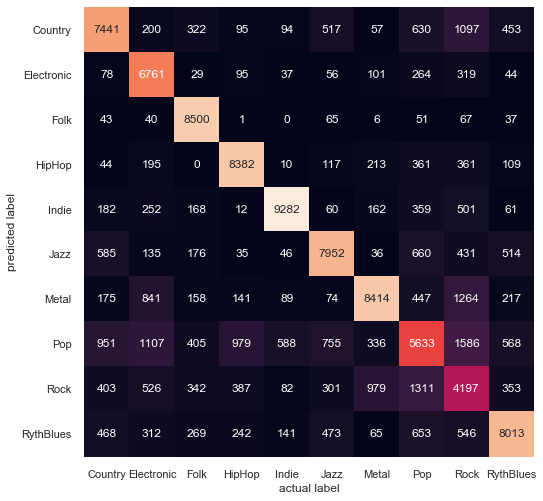

In [209]:
#Confusion matrix - NB-Bow
genre = ['Country','Electronic','Folk', 'HipHop','Indie','Jazz','Metal','Pop','Rock',  
       'RythBlues']
mat = confusion_matrix(y_test, y_pred)
sb.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genre, 
    yticklabels=genre
)
plt.ylabel('predicted label')
plt.xlabel('actual label');

In [200]:
#Naive Bayes with TF-IDF
nb_tfidf = Pipeline([('tfidf_vectorizer', TfidfVectorizer(lowercase = False)), ('nb1', MultinomialNB())])
nb_tfidf.fit(X1_train, y1_train)
y1_pred = nb_tfidf.predict(X1_tests)
print(pd.crosstab(y1_test,y1_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y1_pred))
print('Accuracy of the model is',accuracy_score(y1_test, y1_pred)*100,'%')
print(f1_score(y1_test, y1_pred,average = 'macro'))

Predicted   Country  Electronic  Folk  HipHop  Indie  Jazz  Metal   Pop  Rock  \
Actual                                                                          
Country        7916          41    92     117    142   422    118   825   168   
Electronic      260        7082    30     417    226    83    397  1201   160   
Folk            141           0  9581       0     30    77     20   293     0   
HipHop          110          69    13    8830     14    20    101   644   206   
Indie            88           7    18      30   9533    19     17   439     6   
Jazz            665          47   120     200     40  7708     46   699   169   
Metal            86         101    33     333    234    34   8245   416   751   
Pop             686         220    87     705    418   608    328  5604   697   
Rock           1390         370   161     624    666   376   1137  1855  2995   
RythBlues       370          11    37     167     86   365    106   348    85   

Predicted   RythBlues  
Act

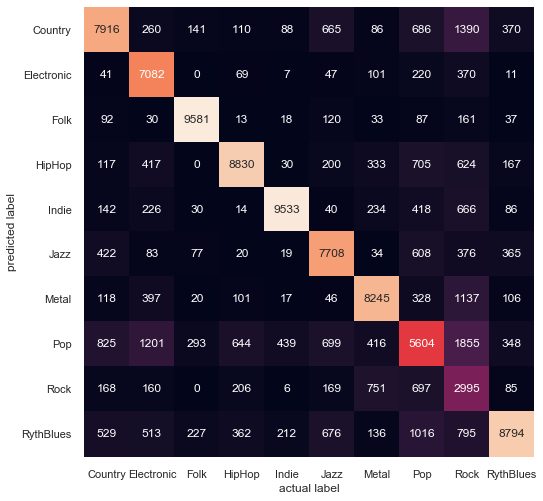

In [210]:
#Confusion matrix - NB-tfidf
genre = ['Country','Electronic','Folk', 'HipHop','Indie','Jazz','Metal','Pop','Rock',  
       'RythBlues']
mat = confusion_matrix(y1_test, y1_pred)
sb.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genre, 
    yticklabels=genre
)
plt.ylabel('predicted label')
plt.xlabel('actual label');

In [207]:
#Logistic Regression with Bag of words
lr_bow = Pipeline([('bow_vectorizer', CountVectorizer(lowercase = False)), ('lr', LogisticRegression())])
lr_bow.fit(X_train, y_train)
y_pred_lr_bow = lr_bow.predict(X_test)
print(pd.crosstab(y_test,y_pred_lr_bow,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred_lr_bow))
print('Accuracy of the model is',accuracy_score(y_test, y_pred_lr_bow)*100,'%')
print(f1_score(y_test, y_pred_lr_bow,average = 'macro'))

Predicted   Country  Electronic   Folk  HipHop  Indie  Jazz  Metal   Pop  \
Actual                                                                     
Country        7531         212     57      36    171   698     75   560   
Electronic       54        9295      6      25    110   124    123   253   
Folk              0           0  10369       0      0     0      0     0   
HipHop           60         108      4    9421     22    49     77   319   
Indie            17          31      0       0  10183    16      0    17   
Jazz            261         100     34      18     59  9045     26   296   
Metal            91         286     19      43    116    61   8742   217   
Pop             487         620     55     356    375   716    332  5620   
Rock            960         853    154     219    628   662   1146  1284   
RythBlues        59          60      9       4     18   340     13   177   

Predicted   Rock  RythBlues  
Actual                       
Country      713        317

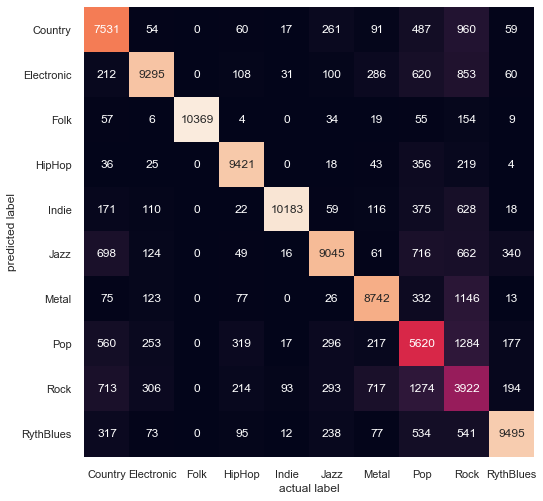

In [211]:
#Confusion matrix - NB-tfidf
genre = ['Country','Electronic','Folk', 'HipHop','Indie','Jazz','Metal','Pop','Rock',  
       'RythBlues']
mat = confusion_matrix(y_test, y_pred_lr_bow)
sb.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genre, 
    yticklabels=genre
)
plt.ylabel('predicted label')
plt.xlabel('actual label');

In [212]:
#Logistic Regression with Tfidf
lr_tfidf = Pipeline([('tfidf', TfidfVectorizer(lowercase = False)), ('lr', LogisticRegression())])
lr_tfidf.fit(X_train, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test)
print(pd.crosstab(y_test,y_pred_tfidf,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, y_pred_tfidf))
print('Accuracy of the model is',accuracy_score(y_test, y_pred_tfidf)*100,'%')
print(f1_score(y_test, y_pred_tfidf,average = 'macro'))

Predicted   Country  Electronic   Folk  HipHop  Indie  Jazz  Metal   Pop  \
Actual                                                                     
Country        7633         205    118      66    166   616     75   620   
Electronic      131        9025     24      56     84    94    136   515   
Folk              0           0  10369       0      0     0      0     0   
HipHop           90         176     18    9058     29    53    128   445   
Indie             6          74      0       0  10046    12     16   104   
Jazz            387         116     51      80     62  8570     32   446   
Metal            88         295     29      75    184    71   8671   271   
Pop             636         769    102     440    474   701    326  5215   
Rock           1053         954    166     186    688   625   1193  1574   
RythBlues       109          69     55      37     50   247      3   327   

Predicted   Rock  RythBlues  
Actual                       
Country      510        361

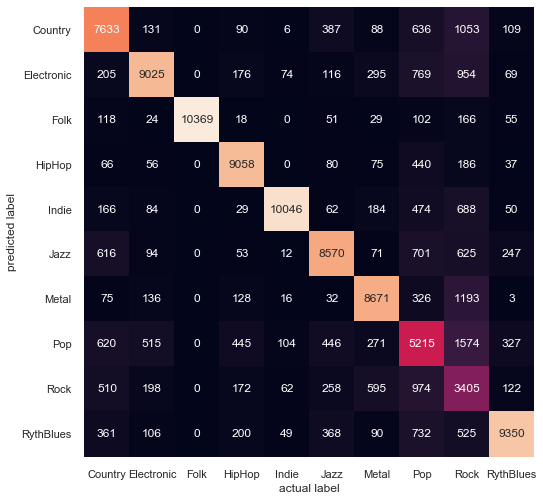

In [213]:
#Confusion matrix - NB-tfidf
genre = ['Country','Electronic','Folk', 'HipHop','Indie','Jazz','Metal','Pop','Rock',  
       'RythBlues']
mat = confusion_matrix(y_test, y_pred_tfidf)
sb.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=genre, 
    yticklabels=genre
)
plt.ylabel('predicted label')
plt.xlabel('actual label');

In [81]:
frame.shape

(518460, 5)

In [203]:
x = frame["cleaned_lyrics"]
y = frame["genre"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

cv = CountVectorizer(lowercase = 'False')
x_train_cv = cv.fit_transform(X_train)
x_test_cv = cv.transform(X_test)

lr_bow = LogisticRegression()
lr_bow.fit(x_train_cv, y_train)
pred = lr_bow.predict(x_test_cv)
print(pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y_test, pred))
print('Accuracy of the model is {}%'.format(round(accuracy_score(y_test,pred)*100),2))

Predicted   Country  Electronic   Folk  HipHop  Indie  Jazz  Metal   Pop  \
Actual                                                                     
Country        7456         223     70      19    218   766     90   466   
Electronic      158        8484     44      20    198   157    312   312   
Folk             20           0  10455       0      0     0      0     0   
HipHop          103         148     20    9315     33    44    109   294   
Indie            81          74      0       0   9853    22     21    64   
Jazz            544         134     54      51    106  8613     30   274   
Metal           112         390     34      56    193    68   8298   201   
Pop             790         872    109     389    437   824    341  4469   
Rock           1111         953    175     193    707   625   1173  1113   
RythBlues       234         105     22       7     51   478     31   320   

Predicted   Rock  RythBlues  
Actual                       
Country      797        272

In [168]:
frame.genre.unique()

array(['Rock', 'Pop', 'Metal', 'HipHop', 'Country', 'Jazz', 'Electronic',
       'RythBlues', 'Indie', 'Folk'], dtype=object)

In [175]:
type(y_test)

numpy.ndarray

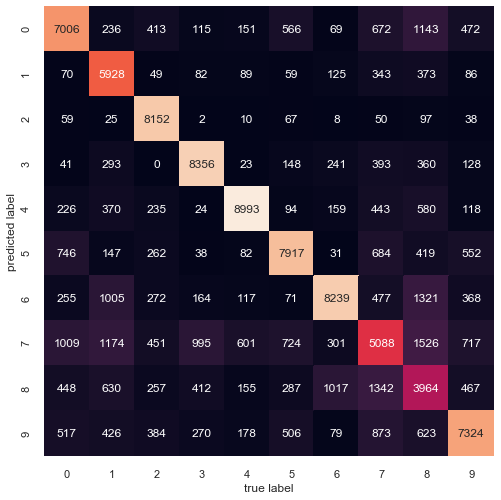

In [193]:
mat = confusion_matrix(y_test, pred)
sb.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
#     xticklabels=genres, 
#     yticklabels=genres
)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [215]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))
list1 = ['dog', 'cat']
list2 = ['dog', 'cat']
jaccard_similarity(list1, list2)

1.0

In [217]:
frame_rec = frame[['cleaned_lyrics','genre']]

In [218]:
frame_rec.head()

,cleaned_lyrics,genre
1,Walk mornin ' dew honey Walk mornin ' dew toda...,Rock
2,I know 's clich When say doomed could start We...,Rock
3,Fist Fist five Fist I 'm country boy I got sou...,Rock
4,It could day It could day It could day Nothing...,Rock
6,"I call name 're Was I blame unfair Oh , I ca n...",Rock


In [246]:
dummy = pd.read_excel('dummy.xlsx')

In [247]:
dummy

,Lyrics,Genre,Id
0,Shape of you,Metal,1
1,Shape shape of you is square and circle,Rock,2
2,Running in circles with the shape,Rock,3
3,wow what a shape of you she has got them,Rock,4


In [248]:
dummy.Lyrics = dummy.Lyrics.str.lower()
dummy['tokens'] = dummy.Lyrics.str.split()

In [249]:
dummy

,Lyrics,Genre,Id,tokens
0,shape of you,Metal,1,"[shape, of, you]"
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]"
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]"
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ..."


In [250]:
type(dummy['tokens'][0])

list

In [275]:
dummy.Lyrics = dummy.Lyrics.str.lower()
empty = []
s = str(input('Enter a song lyrics '))
list1 = s.split()
for i in range(0,4):
    list2 = dummy['tokens'][i]
    s1 = set(list1)
    s2 = set(list2) 
    empty.append(len(s1.intersection(s2)) / len(s1.union(s2)))

sim = pd.DataFrame(empty,columns= ['similarity'])
dummy = pd.concat([dummy,sim],axis=1)
sort = dummy.sort_values('similarity',ascending = False)
sort

Enter a song lyrics shape of you


,Lyrics,Genre,Id,tokens,similarity
0,shape of you,Metal,1,"[shape, of, you]",1.000000
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]",0.428571
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ...",0.300000
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]",0.125000


In [276]:
dummy.drop('similarity',inplace=True,axis=1)

In [271]:
sort

,Lyrics,Genre,Id,tokens,similarity
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]",0.125000
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ...",0.300000
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]",0.428571
0,shape of you,Metal,1,"[shape, of, you]",1.000000


In [278]:
dummy['similarity'] = " "
dummy

,Lyrics,Genre,Id,tokens,similarity
0,shape of you,Metal,1,"[shape, of, you]",
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]",
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]",
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ...",


In [279]:
s = str(input('Enter a song lyrics '))
list1 = s.split()
for i in range(0,4):
    list2 = dummy['tokens'][i]
    s1 = set(list1)
    s2 = set(list2) 
    dummy['similarity'][i] = (len(s1.intersection(s2)) / len(s1.union(s2)))

dummy

Enter a song lyrics shape of you


,Lyrics,Genre,Id,tokens,similarity
0,shape of you,Metal,1,"[shape, of, you]",1
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]",0.428571
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]",0.125
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ...",0.3


In [281]:
s = str(input('Enter a song lyrics '))
list1 = s.split()
for i in range(0,4):
    list2 = dummy['tokens'][i]
    s1 = set(list1)
    s2 = set(list2) 
    dummy['similarity'][i] = (len(s1.intersection(s2)) / len(s1.union(s2)))

dummy

Enter a song lyrics shape


,Lyrics,Genre,Id,tokens,similarity
0,shape of you,Metal,1,"[shape, of, you]",0.333333
1,shape shape of you is square and circle,Rock,2,"[shape, shape, of, you, is, square, and, circle]",0.142857
2,running in circles with the shape,Rock,3,"[running, in, circles, with, the, shape]",0.166667
3,wow what a shape of you she has got them,Rock,4,"[wow, what, a, shape, of, you, she, has, got, ...",0.1
